# Import Data
Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/code 

**Content**

You own supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**

You want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Cleaning 


In [4]:
# Check missing values
df_missing = df.isnull().sum()
df_missing

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Check Cardinality
print(df.nunique())

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


In [6]:
#Rename Columns 
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Feature Engineering 

In [7]:
#Convert categorical values to numerical values 

# Option 1: Using a mapping function
gender_mapping = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(gender_mapping)

# Option 2: Using label encoding (if you only have two categories)
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['gender'] = label_encoder.fit_transform(df['gender'])

df.head()

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
# Drop 'CustomerID' as it is primary key 
X = df.drop('CustomerID', axis =1)
X.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
#Check Min, Max, average
min_max_avg_df = df.agg(['min', 'max', 'mean'])
print(min_max_avg_df)

      CustomerID  Gender    Age  Income  Score
min          1.0    0.00  18.00   15.00    1.0
max        200.0    1.00  70.00  137.00   99.0
mean       100.5    0.44  38.85   60.56   50.2


# Basic EDA

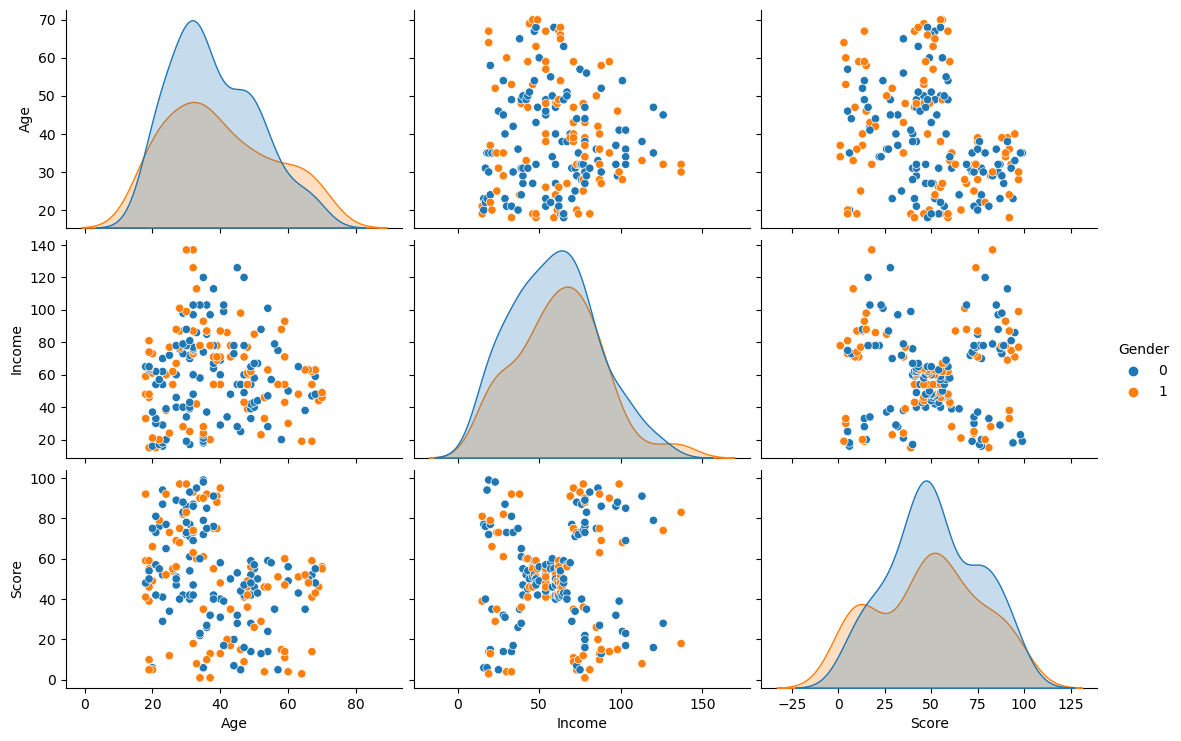

In [10]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features (Age, Income, Score - Only 3 features) 

# Clustering Method 1: K-Means++

## Step 1: Find elbow-point to select k-cluster value. 

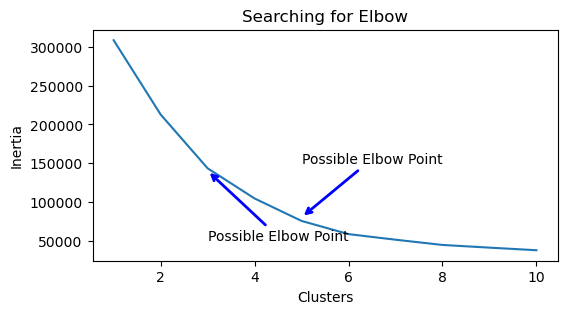

In [11]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(6, 3))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

## Step 2: Experiment with k=3, k=5, k=6 visual plots

**K-Means with 'Income' and 'Spending Score'**

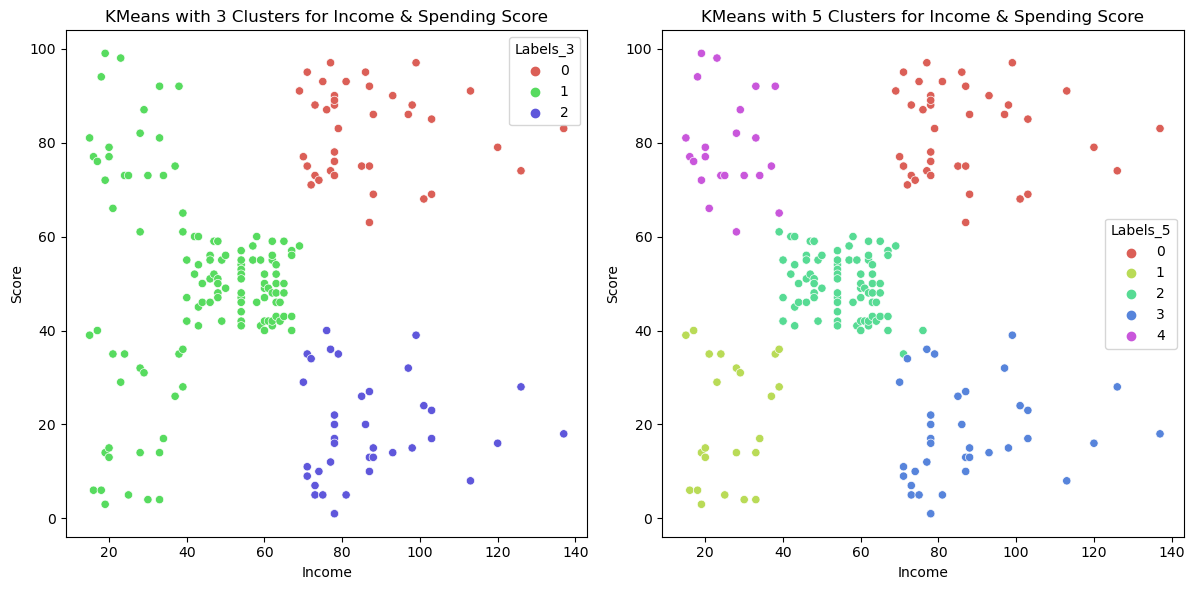

In [12]:
# KMeans clustering with 3 clusters
km3 = KMeans(n_clusters=3).fit(X)
X['Labels_3'] = km3.labels_

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels_3'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters for Income & Spending Score')

# KMeans clustering with 5 clusters
km5 = KMeans(n_clusters=5).fit(X)
X['Labels_5'] = km5.labels_

plt.subplot(1, 3, 2)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels_5'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters for Income & Spending Score')

plt.tight_layout()
plt.show()


By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:

- Label 0 is low income and low spending
- Label 1 is high income and high spending
- Label 2 is mid income and mid spending
- Label 3 is high income and low spending
- Label 4 is low income and high spending

**K-Means with 'Income','Spending Score', 'Age'**

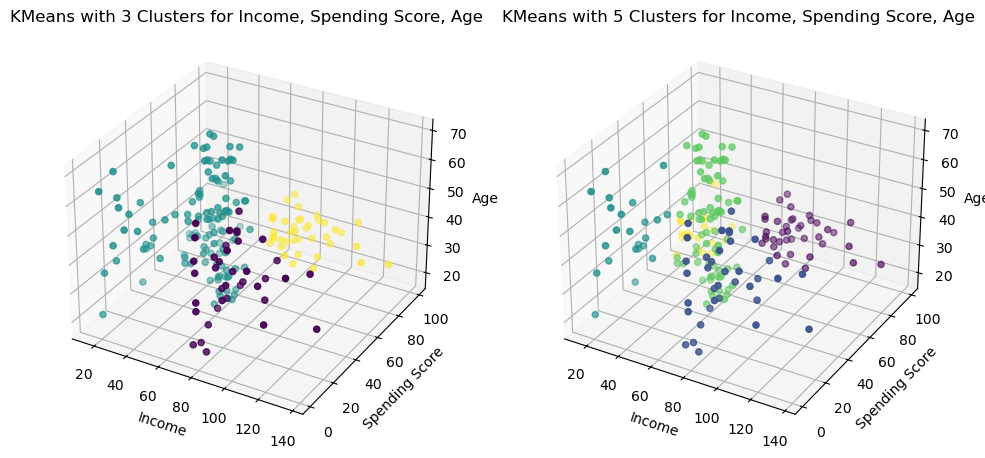

In [13]:
# Fit KMeans with 3 clusters
km3 = KMeans(n_clusters=3).fit(X)
X['Labels_3'] = km3.labels_

# Plot for 3 clusters
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels_3'], cmap='viridis')
ax1.set_title('KMeans with 3 Clusters for Income, Spending Score, Age')
ax1.set_xlabel('Income')
ax1.set_ylabel('Spending Score')
ax1.set_zlabel('Age')

# Fit KMeans with 5 clusters
km5 = KMeans(n_clusters=5).fit(X)
X['Labels_5'] = km5.labels_

# Plot for 5 clusters
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels_5'], cmap='viridis')
ax2.set_title('KMeans with 5 Clusters for Income, Spending Score, Age')
ax2.set_xlabel('Income')
ax2.set_ylabel('Spending Score')
ax2.set_zlabel('Age')

plt.show()

## Step 3: Evaluate Scores 
- **Inertia**: Inertia measures how tightly grouped the clusters are. It's the sum of squared distances between each data point and its centroid within a cluster. Lower inertia indicates better clustering. You can access the inertia score using the inertia_ attribute of the KMeans object.

- **Silhouette Score**: Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. You can calculate the silhouette score using silhouette_score from the sklearn.metrics module.

- **Visual Inspection**: You can visually inspect the clusters to see if they make sense and are separable. This can be done using scatter plots, parallel coordinates plots, or other visualization techniques.

- **Domain Knowledge**: Depending on the domain of your data, you may have some understanding of what constitutes a "good" clustering. For example, in customer segmentation, clusters should represent distinct groups with different behaviors.

In [14]:
from sklearn.metrics import silhouette_score

# Empty lists to store scores
inertia_scores = []
silhouette_scores = []

# Iterate over different numbers of clusters
for n_clusters in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X, kmeans.labels_)
    
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Number of Clusters': range(2, 11),  # Start from 2 clusters
    'Inertia': inertia_scores,
    'Silhouette Score': silhouette_scores
})

print(scores_df)

   Number of Clusters        Inertia  Silhouette Score
0                   2  213294.560614          0.292874
1                   3  143445.171308          0.384639
2                   4  104445.873838          0.405833
3                   5   75401.564781          0.444767
4                   6   58365.964505          0.452418
5                   7   51149.092515          0.441221
6                   8   44367.935648          0.427733
7                   9   40703.812860          0.411043
8                  10   37196.074941          0.381592


# Clustering Method 2: Agglomerative Hierarchical Clustering


## Step 1: Experiment with k=3 & k=5 visual plots & different distance types (complete, single, average)

In [15]:
# Agglomerative clustering with 3 clusters (single)
agglom_3 = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X)
X['Labels_3'] = agglom_3.labels_

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels_3', 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative 3 Clusters - Single Linkage')

# Agglomerative clustering with 5 clusters (single)
agglom_5 = AgglomerativeClustering(n_clusters=5, linkage='single').fit(X)
X['Labels_5'] = agglom_5.labels_

plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels_5', 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative 5 Clusters - Single Linkage')

# Agglomerative clustering with 3 clusters (complete)
agglom_3 = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
X['Labels_3'] = agglom_3.labels_

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels_3', 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative 3 Clusters - Complete Linkage')

# Agglomerative clustering with 5 clusters (complete)
agglom_5 = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)
X['Labels_5'] = agglom_5.labels_

plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels_5', 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative 5 Clusters - Complete Linkage')

# Agglomerative clustering with 3 clusters (average)
agglom_3 = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
X['Labels_3'] = agglom_3.labels_

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels_3', 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative 3 Clusters - Average Linkage')

# Agglomerative clustering with 5 clusters (average)
agglom_5 = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels_5'] = agglom_5.labels_

plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels_5', 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative 5 Clusters - Average Linkage')

plt.show()


NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))

# Agglomerative clustering with 3 clusters (single)
agglom_3 = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X)
X['Labels_3'] = agglom_3.labels_

ax = fig.add_subplot(231, projection='3d')
ax.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels_3'], cmap='hsv')
ax.set_title('Agglomerative 3 Clusters - Single Linkage')

# Agglomerative clustering with 5 clusters (single)
agglom_5 = AgglomerativeClustering(n_clusters=5, linkage='single').fit(X)
X['Labels_5'] = agglom_5.labels_

ax = fig.add_subplot(232, projection='3d')
ax.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels_5'], cmap='hsv')
ax.set_title('Agglomerative 5 Clusters - Single Linkage')

# Agglomerative clustering with 3 clusters (complete)
agglom_3 = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
X['Labels_3'] = agglom_3.labels_

ax = fig.add_subplot(233, projection='3d')
ax.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels_3'], cmap='hsv')
ax.set_title('Agglomerative 3 Clusters - Complete Linkage')

# Agglomerative clustering with 5 clusters (complete)
agglom_5 = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)
X['Labels_5'] = agglom_5.labels_

ax = fig.add_subplot(234, projection='3d')
ax.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels_5'], cmap='hsv')
ax.set_title('Agglomerative 5 Clusters - Complete Linkage')

# Agglomerative clustering with 3 clusters (average)
agglom_3 = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
X['Labels_3'] = agglom_3.labels_

ax = fig.add_subplot(235, projection='3d')
ax.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels_3'], cmap='hsv')
ax.set_title('Agglomerative 3 Clusters - Average Linkage')

# Agglomerative clustering with 5 clusters (average)
agglom_5 = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels_5'] = agglom_5.labels_

ax = fig.add_subplot(236, projection='3d')
ax.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels_5'], cmap='hsv')
ax.set_title('Agglomerative 5 Clusters - Average Linkage')

plt.tight_layout()
plt.show()


**By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.**

**We can also see that average & complete linkage method gives better clustering shape compared to single linkage method.**

We can analyze our 5 clusters in detail now:

Label 0 is low income and low spending
Label 1 is high income and high spending
Label 2 is mid income and mid spending
Label 3 is high income and low spending
Label 4 is low income and high spending

## Step 2: Dendrogram Associated for the Agglomerative Hierarchical Clustering

In [ ]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Single Linkage')
dendro = hierarchy.dendrogram(Z = hierarchy.linkage(dist, 'single'), leaf_rotation=0, leaf_font_size=3, orientation='top')

plt.subplot(1, 3, 2)
plt.title('Complete Linkage')
dendro = hierarchy.dendrogram(Z = hierarchy.linkage(dist, 'complete'), leaf_rotation=0, leaf_font_size=3, orientation='top')

plt.subplot(1, 3, 3)
plt.title('Average Linkage')
dendro = hierarchy.dendrogram(Z = hierarchy.linkage(dist, 'average'), leaf_rotation=0, leaf_font_size=3, orientation='top')

## Step 3: Evaluate scores


In [ ]:
# Define the range of clusters
n_clusters_range = range(2, 11)

# Dictionary to store silhouette scores for each linkage method
silhouette_scores = {'Single': [], 'Complete': [], 'Average': []}

# Iterate over different linkage methods
for linkage_method in ['single', 'complete', 'average']:
    # Iterate over different numbers of clusters
    for n_clusters in n_clusters_range:
        # Perform hierarchical clustering
        agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        agglom.fit(X)
        
        # Compute silhouette score
        silhouette = silhouette_score(X, agglom.labels_)
        
        # Store silhouette score for the current linkage method
        silhouette_scores[linkage_method.capitalize()].append(silhouette)

# Create a DataFrame to store the silhouette scores
scores_df = pd.DataFrame({
    'Number of Clusters': n_clusters_range,
    'Single': silhouette_scores['Single'],
    'Complete': silhouette_scores['Complete'],
    'Average': silhouette_scores['Average']
})

print(scores_df)

In [ ]:
# Find the highest silhouette score and its corresponding number of clusters and linkage method
max_score_info = scores_df.iloc[:, 1:].idxmax()

print("Highest Silhouette Score:")
print(scores_df.loc[max_score_info])

## 5 Clusters appear to be best

# Clustering Method 3: Density Based Clustering (DBScan)
With both K-Means and AHC supporting that 5 is an ideal number of clusters. We want to observe if Density Based Clustering performs well in giving 5 clusters. 

## Step 1: Construct DBScan with 5 clusters

In [ ]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(5, 3))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6, 5 clusters')
plt.show()


In [ ]:
# Perform DBSCAN clustering in 3D
db = DBSCAN(eps=11, min_samples=5).fit(X)

# Assign cluster labels to data points
X['Labels'] = db.labels_

# Visualize the clusters in 3D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'Income', 'Score', and 'Age'
scatter = ax.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels'], cmap='Accent')

ax.set_title('DBSCAN Clustering in 3D')
ax.set_xlabel('Income')
ax.set_ylabel('Score')
ax.set_zlabel('Age')
plt.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

In [ ]:
# Set the parameters
eps = 11
min_samples = 6

# Perform DBSCAN clustering
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

# Check if there are more than one label
unique_labels = np.unique(db.labels_)
if len(unique_labels) > 1:
    # Calculate silhouette score
    silhouette = silhouette_score(X, db.labels_)
else:
    silhouette = None

# Output the results
print("Epsilon:", eps)
print("Min_samples:", min_samples)
print("Silhouette score:", silhouette)

As we can see DBSCAN doesn't perform very well with very low silhouette score of 0.1826620090152882 because the density in our data is not that strong. **Label -1 means outliers so it will appear most as outliers**. We may have performed better if we had had a bigger data.

## Step 2: Experiment with different epsilon score and min_samples scores
Given the low silhouette score when trying to construct 5 clusters, we tried alternatives to get best epsilon score

In [ ]:
# Initialize variables to store the best parameters and silhouette score
best_eps = None
best_min_samples = None
best_silhouette_score = -1  # Initialize with a value lower than any possible silhouette score

# Define the range of epsilon values
min_eps = 0.1
max_eps = 30
num_eps = 30  # Adjust the number of epsilon values as needed

# Generate epsilon values
eps_values = np.linspace(min_eps, max_eps, num=num_eps)

# Define the range of min_samples values
min_samples_min = 3
min_samples_max = 35
num_min_samples = 8  # Adjust the number of min_samples values as needed

# Generate min_samples values
min_samples_values = np.linspace(min_samples_min, min_samples_max, num=num_min_samples, dtype=int)

for eps in eps_values:
    for min_samples in min_samples_values:
        # Perform DBSCAN clustering
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        
        # Check if there are more than one label
        unique_labels = np.unique(db.labels_)
        if len(unique_labels) > 1:
            # Calculate silhouette score
            silhouette = silhouette_score(X, db.labels_)
            
            # Check if the current silhouette score is better than the best one so far
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

# Output the best parameters and silhouette score
print("Best epsilon:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_silhouette_score)


In [ ]:
db = DBSCAN(eps= 23, min_samples=7).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(5, 3))
sns.scatterplot(x=X['Score'], y=X['Income'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 18, min samples 3')
plt.show()


In [ ]:
# Perform DBSCAN clustering
db = DBSCAN(eps=22, min_samples=7).fit(X)

# Assign cluster labels to data points
X['Labels'] = db.labels_

# Visualize the clusters in 3D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'Income', 'Score', and 'Age'
scatter = ax.scatter(X['Income'], X['Score'], X['Age'], c=X['Labels'], cmap='Accent')

ax.set_title('DBSCAN Clustering in 3D')
ax.set_xlabel('Income')
ax.set_ylabel('Score')
ax.set_zlabel('Age')
plt.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

When we use the parameter settings with the best epsilon score, we can visually see that the clustering results in only 1 cluster and some outliers. 

# Conclusion 

## **K-Means (higher silhouette score) followed by Agglomerative Hierarchical Clustering performed the best while DBScan performed the worst.**


K-Means
Silhouette Score: 0.444674 (Cluster of 5) 

Agglomerative Hierarchical Clustering
Silhouette Score: 0.436866 (Cluster of 5) - Complete/Average Linkage

DBScan 
Silhouette Score: 0.1826620090152882

K-Means clustering often works well on datasets where clusters are well-separated and roughly spherical in shape. 

Spherical Clusters Assumption: K-Means operates under the assumption that clusters are spherical and have roughly equal variance. In the context of customer segmentation based on features like 'Annual Income' and 'Spending Score', it's plausible that the clusters in the dataset could exhibit spherical characteristics, especially if there are distinct groups of customers with different spending behaviors.

Scalability: K-Means is computationally efficient and scales well to large datasets. If you have a large number of data points or features, K-Means can be a suitable choice due to its speed and efficiency.

Easy Interpretability: K-Means produces clusters that are easy to interpret, as each data point is assigned to the nearest cluster centroid. This simplicity makes it straightforward to understand and communicate the results of the clustering analysis.

Silhouette Score Optimization: The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better-defined clusters. If K-Means achieved the highest silhouette score among the methods tested, it suggests that the clusters formed by K-Means are well-separated and internally cohesive, which aligns with the assumptions of K-Means.

Overall, the effectiveness of K-Means on this dataset could be attributed to its simplicity, scalability, and the underlying characteristics of the data that align well with the assumptions of the algorithm. 